# <p style="text-align:center;">Ley de Benford para detección de fraudes</p>

Esta ley es también es conocida con el nombre de "Ley del primer digito" y fue descubierta en el año 1881 por el matemático [Simón Newcomb](https://es.wikipedia.org/wiki/Simon_Newcomb), quien observó que las primeras páginas de los logaritmos se encontraban mas usadas y maltratadas en comparación de las últimas páginas de los logartimos. Lo anterior le generó duda pues aparentemente las páginas no eran equiprobables, sino que por el contrario, parecía haber una tendencia evidente a las primeras páginas de acuerdo al orden, es decir, que la primer página es más probable que sea utilizada, después la segunda página era la más probable a ser utilizada y así hasta la novena página que es la menos frecuente. Lo anterior lo efectuó sin una evidencia, argumento o fórmula matemática.

En 1938, [Frank Benford](https://es.wikipedia.org/wiki/Frank_Benford) observó el mismo evento en las tablas de logaritmos y realizó una prueba empírica con 20,229 números agrupados en 20 muestras. Con base en los resultados empíricos se publicó el resultado en la denominada "Ley de los números anómalos" para la probabilidad de que el primer digito sea "d".

## <p style="text-align:center;">Fórmula</p>

Un conjunto de números cumple con la ley de Benford si para el primer digito de la parte decimal, llamemoslo d, se cumple lo siguiente:

$$p(X=d) = \log_{10}\left(1 + \frac{1}{d}\right) = log_{10}(d+1) - log_{10}(d)$$
$$1 \leq d \leq 9$$





## <p style="text-align:center;">Distribución</p>

La distribución graficamente que sigue la ley de Benford es la siguiente:

<BarContainer object of 9 artists>

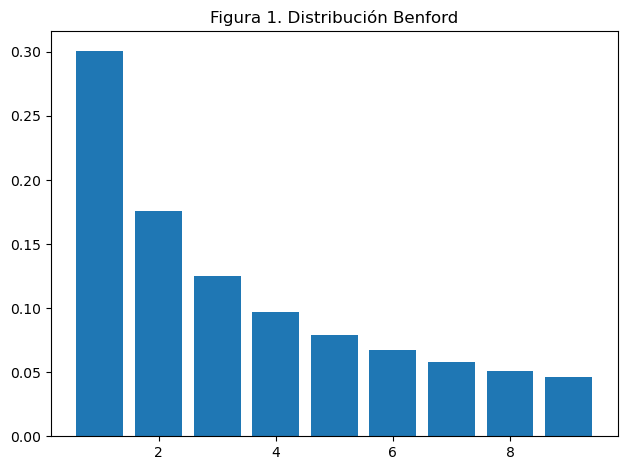

In [32]:
# Importar librerías
import matplotlib.pyplot as plt

# Generar lista de datos con valor de eje abscisa y ordenadas
frecuencias_benford = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]
x = [1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots() # Generar la gráfica
plt.title('Figura 1. Distribución Benford') # Agregar un nombre a la gráfica
plt.tight_layout() 
ax.bar(x = x, height = frecuencias_benford) #Centrar barras en el gráfico

Los valores para cada dígito y su probabilidad de ocurrencia es la siguiente:

| Dígito | pBenford (%) |
|--------|-------------|
| 1      | 30.1        |
| 2      | 17.6        |
| 3      | 12.5        |
| 4      | 9.7         |
| 5      | 7.9         |
| 6      | 6.7         |
| 7      | 5.8         |
| 8      | 5.1         |
| 9      | 4.6         |
<center>Figura 2. Valores distribución Benford</center>

## <p style="text-align:center;">Código</p>

El primer paso será importar las librerías que se utilizarán en el código.

In [79]:
#importar librerias

import random as rd
import pandas as pd

A continuación cree una función con la que se pueden generar números flotantes (reales) aleatorios, colocando parámetros a la función con el objetivo de hacerla configurable en aspectos como la cantidad de números requeridos y el rango de los valores entre los que se puede generar el número aleatorio.

In [80]:
def gen_flotantes(cantidad=10,rinf=1,rsup=100):
    
    datos = [] #Crear lista vacía
    
    for i in range(cantidad): #Bucle para creación de números aleatorios
        datos.append(round(rd.uniform(rinf,rsup),2)) # Creación de números reales (flotantes) aleatorios 
    return datos

Se define una función a la que se le carga una lista de datos y se recuperará un valor TRUE o FALSE, dependiendo de si se ajusta a una distribución Benford o no.

In [41]:
def es_distr_benford(datos):
    
    datos_limpios = [] #Crear lista vacía
    frecuencias = {} #Crear diccionario vacío
    frecuencias_benford = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

    
    for i in range(len(datos)): #Bucle para recorrer la lista completa extrayendo el primer dígito de cada número
        datos_limpios.append(int(str(datos[i])[0])) #Extracción del primer dígito de cada número
   
    
    # Iterar sobre la lista de datos y contar las ocurrencias
    for numero in datos_limpios:
        if numero in frecuencias:
            frecuencias[numero] += 1
        else:
            frecuencias[numero] = 1 

    df = pd.DataFrame(frecuencias.items())

    df["Número"] = df[0]
    df["Frecuencia"] = df[1]
    df["Porcentaje frecuencia"] = df[1]/len(datos)*100
    df = df.drop(columns=[0])
    df = df.drop(columns=[1])
    df = df.sort_values(by='Número')
    
    
    diferencias = [abs(frec_real - frec_benford) for frec_real, frec_benford in zip(df['Porcentaje frecuencia'], frecuencias_benford)]

    if all(dif <= 0.05 for dif in diferencias):
        return True
    else:
        return False

A continuación un ejemplo de la utilización de la función.

In [42]:
es_distr_benford(gen_flotantes(1000,1,100))

False

<div style="background-color: #FDFD96; padding: 10px;">

Se puede observar que el resultado es FALSO, lo cual tiene mucho sentido debido a que estamos utilizando una función existente en la librería random llamada UNIFORM, la cual devuelve datos flotantes (reales) de una distribución uniforme, por lo que es de esperarse que no se asemeje a la distribución de Benford.

Se define una función a la que se le carga una lista de datos y se recuperará un mensaje para el usuario donde se indica si los datos ingresados se ajustan a una distribución Benford o no.

In [43]:
def es_distr_benford2(datos):
    
    datos_limpios = [] #Crear lista vacía
    frecuencias = {} #Crear diccionario vacío
    frecuencias_benford = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

    

    for i in range(len(datos)): #Bucle para recorrer la lista completa extrayendo el primer dígito de cada número
        datos_limpios.append(int(str(datos[i])[0])) #Extracción del primer dígito de cada número
        
    
    
    
    # Iterar sobre la lista de datos y contar las ocurrencias
    for numero in datos_limpios:
        if numero in frecuencias:
            frecuencias[numero] += 1
        else:
            frecuencias[numero] = 1 

    df = pd.DataFrame(frecuencias.items())

    df["Número"] = df[0]
    df["Frecuencia"] = df[1]
    df["Porcentaje frecuencia"] = df[1]/len(datos)*100
    df = df.drop(columns=[0])
    df = df.drop(columns=[1])
    df = df.sort_values(by='Número')
    
    
    diferencias = [abs(frec_real - frec_benford) for frec_real, frec_benford in zip(df['Porcentaje frecuencia'], frecuencias_benford)]

    if all(dif <= 0.05 for dif in diferencias):
        print("El conjunto de datos cumple con la distribución de Benford.")

    else:
        print("El conjunto de datos no cumple con la distribución de Benford.")    

A continuación un ejemplo de la utilización de esta segunda función.

In [44]:
es_distr_benford2(gen_flotantes(1000,1,100))

El conjunto de datos no cumple con la distribución de Benford.


<div style="background-color: #FDFD96; padding: 10px;">

Nuevamente se puede observar que el resultado es que los datos no cumplen con la distribución de Benford, lo cual tiene mucho sentido debido a que estamos utilizando una función existente en la librería random llamada UNIFORM, la cual devuelve datos flotantes (reales) de una distribución uniforme, por lo que es de esperarse que no se asemeje a la distribución de Benford.

Se define una función a la que se le carga una lista de datos y se recuperará un data frame con la distribución de los datos ingresados y los correspondientes a la distribución de Benford.

In [89]:
def distr_benford(datos):
    
    datos_limpios = [] #Crear lista vacía
    frecuencias = {} #Crear diccionario vacío
    frecuencias_benford = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]


    for i in range(len(datos)): #Bucle para recorrer la lista completa extrayendo el primer dígito de cada número
        datos_limpios.append(int(str(datos[i])[0])) #Extracción del primer dígito de cada número
        
    # Iterar sobre la lista de datos y contar las ocurrencias
    for numero in datos_limpios:
        if numero in frecuencias:
            frecuencias[numero] += 1
        else:
            frecuencias[numero] = 1 

    df = pd.DataFrame(frecuencias.items())

    df["Número"] = df[0]
    df["Frecuencia"] = df[1] #Cálculo de la frecuencia relativa
    df["Porcentaje frecuencia"] = df[1]/len(datos)  #Cálculo de porcentaje de frecuencia relativa
    df = df.drop(columns=[0]) #Eliminar la columan
    df = df.drop(columns=[1]) #Eliminar la columan
    df = df.sort_values(by='Número') #Ordenar por la columna Número
    df = df.reset_index(drop=True) #Re ordenamiento de los índices para que respeten el órden establecido por la columna Número    

    # Agregar la lista como una nueva columna
    df['Frecuencias Benford'] = frecuencias_benford
    
    df.to_excel('Frecuencias_datos.xlsx', index=False)

    # Se abre una conexión con la ruta en donde está almacenado el notebook sobre el que se está trabajando
    mi_io = open('Frecuencias_datos.txt', 'w', encoding='utf-8')
    
    for i, r in df.iterrows(): #Se inicia un ciclo para obtener un índice del data frame junto con los datos del data frame.
        if i == 8:
            mi_io.write(f'El número {r["Número"]} tiene una frecuencia relativa {int(r["Frecuencia"])} que corresponde al {round(r["Porcentaje frecuencia"],3)} en comparación de Benford {r["Frecuencias Benford"]}.')
        else:
            mi_io.write(f'El número {r["Número"]} tiene una frecuencia relativa {int(r["Frecuencia"])} que corresponde al {round(r["Porcentaje frecuencia"],3)} en comparación de Benford {r["Frecuencias Benford"]}.\n')
    
    mi_io.close()
    
    return(df)

A continuación un ejemplo de la utilización de esta tercera función.

In [90]:
distr_benford(gen_flotantes(1000,1,100))

,Número,Frecuencia,Porcentaje frecuencia,Frecuencias Benford
0,1,97,0.097,0.301
1,2,124,0.124,0.176
2,3,114,0.114,0.125
3,4,123,0.123,0.097
4,5,108,0.108,0.079
5,6,101,0.101,0.067
6,7,105,0.105,0.058
7,8,110,0.110,0.051
8,9,118,0.118,0.046


## <p style="text-align:center;">Conclusiones</p>

A lo largo del presente codelab me percaté que mi nivel de programación es mejor de lo que yo tenía considerado. Para ser sincero la elaboración de las funciones las realicé de forma intuitiva y me fue fácil elaborarlas a excepción de la comparación de los porcentajes de la frecuencia relativa, para lo cual si utilicé el recurso de CHATGPT, se comparte el prompt y la respuesta recibida.

En un principio estaba confundido sobre lo que podría realizar en la parte del código y decidí hacer un código que compare un conjunto de datos y te regrese verdadero o falso, indicando si el conjunto de datos se comportan de acuerdo a la Ley de Benfor. Esto fue debido a que leí un ejemplo en donde utilizaban la ley de Benford en los bancos para analizar en qué conjunto de transacciones (separadas por estado y día) se debía realizar una auditoría.

Además de la función antes mencionada, considero que también sería importante una función que en lugar de regresar un simple verdadero o falso, le muestre al usuario un mensaje confirmando el hallazgo de la ley de Benford a los datos ingresados, además de otra función donde muestre los cálculos efectuados en al función, como son un Data Frame con las frecuencias relativas calculadas en comparación con las esperadas por la ley de Benford.

El codelab y en general la clase ha sido de las que más me ha gustado por la práctica que hemos tenido. Además de que me gusta que se haya subido el nivel de la especialidad. Cautivó totalmente mi atención y me quedo muy intrigado al respecto de muchos temas, de los cuales investigaré más por mi cuenta en caso de que no se vea en materias futuras.

La conclusión del tema de ley de Benford es que es una distribución que puede servir como un primer parámetro para identificar posibles fraudes; sin embargo, no nos podemos quedar con este como único método para la identificación pues existen algúnos "huecos" que no considera está ley, por ejemplo las transacciones que sean de entre $[0.00,0.99]$.

Investigué un poco más y los bancos aplican, de forma adicional, otro tipo de análisis como pueden ser:

* Análisis de Patrones de Transacciones
* Análisis de Comportamiento de Usuario
* Análisis de Transacciones de Alto Riesgo

Entre otros.


# <p style="text-align:center;">Anexos</p>

## <p style="text-align:center;">Fuente de información</p>

**Simon Newcomb**_,para más información dar clic_ [aquí.](https://es.wikipedia.org/wiki/Simon_Newcomb)

**Ley de Benford**_, para más información dar clic_ [aquí.](https://es.wikipedia.org/wiki/Ley_de_Benford)

**Frank Benford**_, Biografía. Para más información dar clic_ [aquí.](https://es.wikipedia.org/wiki/Frank_Benford)





## <p style="text-align:center;">Fuente de figuras</p>


Figura 1. Autoría propia, Histograma de distribución Benford.

Figura 2. Autoría propia, Valores de la distribución Benford.





## <p style="text-align:center;">Consultas realizadas en Chat GPT</p>

<div style="background-color: #c1ffc1; padding: 10px;">
    <p style="color: black; font-weight: bold;">Prompt: Qué es la ley de Benford para detectar fraudes?</p>
    

<p>La Ley de Benford, también conocida como la Ley de los Números Anómalos de Benford, es un principio estadístico que sugiere que en muchas colecciones de datos numéricos del mundo real, los dígitos iniciales tienden a seguir una distribución no uniforme. Esta ley fue propuesta por el físico estadounidense Frank Benford en 1938 y ha encontrado aplicaciones en diversas áreas, incluyendo la detección de fraudes.

La Ley de Benford establece que, en conjuntos de datos que abarcan varias órdenes de magnitud, el dígito "1" tiende a ser el dígito inicial más común, seguido de "2", luego "3", y así sucesivamente, con "9" siendo el dígito inicial menos común. Esto es contrario a lo que podría esperarse intuitivamente, donde se podría pensar que cada dígito inicial tendría la misma probabilidad del 10%.

La aplicación de la Ley de Benford en la detección de fraudes se basa en el hecho de que, cuando se falsifican o manipulan números en un conjunto de datos, es más probable que los dígitos sean distribuidos de manera no natural. Si los datos no siguen la distribución predicha por la ley, esto podría indicar que los números han sido alterados o manipulados.

En el contexto financiero, por ejemplo, la Ley de Benford se ha utilizado para analizar informes contables y estados financieros. Si los números en los informes no siguen la distribución esperada según la ley, podría ser una señal de que los datos han sido manipulados para ocultar fraudes contables u otras irregularidades.

Sin embargo, es importante destacar que la Ley de Benford no es una herramienta infalible para detectar fraudes. Puede haber casos legítimos en los que los datos no sigan esta distribución debido a diversas razones. Es una técnica más que puede utilizarse en conjunto con otras medidas y análisis para evaluar la integridad de los datos y detectar posibles irregularidades.</p>
</div>


<div style="background-color: #c1ffc1; padding: 10px;">
    <p style="color: black; font-weight: bold;">Prompt: Cuál es un ejemplo de aplicación de la ley Benford para detectar fraude?</p>
    

<p>Un ejemplo concreto de aplicación de la Ley de Benford para detectar fraude está en el análisis de los números de facturación en un conjunto de datos financiero. Imagina que estás examinando los números de facturación mensual de una empresa y quieres verificar si hay indicios de manipulación o fraude en esos números. Aquí hay un ejemplo simplificado de cómo podrías aplicar la Ley de Benford:

Supongamos que tienes los siguientes números de facturación mensual para los últimos doce meses:

$$2398, 3152, 4189, 5221, 6125, 7443, 8912, 9763, 10384, 11562, 12876, 13897$$ <br>

Primero, observas los dígitos iniciales de cada número y cuentas cuántas veces aparece cada dígito del 1 al 9 como el primer dígito:

    
    
Dígito 1: 6 veces<br>
Dígito 2: 3 veces<br>
Dígito 3: 1 vez<br>
Dígito 4: 1 vez<br>
Dígito 5: 1 vez<br>
Dígito 6: 0 veces<br>
Dígito 7: 0 veces<br>
Dígito 8: 1 vez<br>
Dígito 9: 0 veces<br>
    
    
Luego, comparas estas frecuencias con las predicciones de la Ley de Benford, que son aproximadamente las siguientes:

Dígito 1: 6 veces
Dígito 2: 3 veces
Dígito 3: 1 vez
Dígito 4: 1 vez
Dígito 5: 1 vez
Dígito 6: 0 veces
Dígito 7: 0 veces
Dígito 8: 1 vez
Dígito 9: 0 veces

    
    
En este caso, puedes observar que los dígitos 1 y 2 están más representados de lo que se esperaría según la Ley de Benford, mientras que los dígitos 3, 4 y 5 están subrepresentados. Esto podría indicar una posible manipulación de los números, ya que los dígitos más bajos (1 y 2) son más comunes de lo esperado y los dígitos más altos (3, 4 y 5) son menos comunes.

Sin embargo, es importante recordar que esta discrepancia no es suficiente para concluir automáticamente que hay fraude. Puede haber explicaciones legítimas para desviaciones de la distribución de Benford, como patrones naturales en ciertos tipos de datos. La Ley de Benford es solo una herramienta que puede generar sospechas y motivar investigaciones adicionales para confirmar o descartar cualquier irregularidad.</p>
</div>


<div style="background-color: #c1ffc1; padding: 10px;">
    <p style="color: black; font-weight: bold;">Prompt: No entendí ese ejemplo, me puedes dar otro?</p>
    

<p>Por supuesto, aquí tienes otro ejemplo más simple de cómo se podría aplicar la Ley de Benford para detectar fraude en un conjunto de datos:

Imagina que estás examinando los montos de gastos reportados en los informes de viáticos de los empleados de una empresa. Tienes una lista de los montos de gastos para un período de tiempo y quieres ver si hay alguna anomalía que podría indicar fraude.

Estos son los montos de gastos reportados:

$$37.50, 68.20, 125.75, 21.30, 92.10, 163.40, 215.60, 14.80, 72.90, 196.25$$ <br>

Primero, extraes los primeros dígitos de cada monto:

$$3, 6, 1, 2, 9, 1, 2, 1, 7, 1$$

    
Ahora cuentas cuántas veces aparece cada dígito del 1 al 9 como el primer dígito:

Dígito 1: 4 veces<br>
Dígito 2: 2 veces<br>
Dígito 3: 1 vez<br>
Dígito 4: 0 veces<br>
Dígito 5: 0 veces<br>
Dígito 6: 1 vez<br>
Dígito 7: 1 vez<br>
Dígito 8: 0 veces<br>
Dígito 9: 1 vez<br>

    
Luego, comparas estas frecuencias con las predicciones de la Ley de Benford:

Dígito 1: 30.1%<br>
Dígito 2: 17.6%<br>
Dígito 3: 12.5%<br>
Dígito 4: 9.7%<br>
Dígito 5: 7.9%<br>
Dígito 6: 6.7%<br>
Dígito 7: 5.8%<br>
Dígito 8: 5.1%<br>
Dígito 9: 4.6%<br>
    
    
En este caso, puedes notar que el dígito 1 aparece más veces de lo esperado según la Ley de Benford, mientras que otros dígitos son menos comunes. Esto podría levantar sospechas de que los montos de gastos han sido manipulados, ya que los dígitos más bajos (como el 1) son más frecuentes de lo que se esperaría.

Nuevamente, es importante señalar que la Ley de Benford no es una prueba definitiva de fraude, pero puede servir como un indicador inicial para investigar más a fondo si hay irregularidades en los datos.</p>
</div>


<div style="background-color: #c1ffc1; padding: 10px;">
    <p style="color: black; font-weight: bold;">Prompt: Dame un ejemplo con 1000  datos que si cumplan con la ley de benford</p>
    

<p>Aquí tienes un ejemplo de 1000 datos generados aleatoriamente que siguen la distribución de la Ley de Benford:

    
<blockquote>    
import numpy as np <br><br>

def generate_benford_data(n): <br>
    data = [] <br>
    for _ in range(n):<br>
        digit = int(str(np.random.choice(range(1, 10))) + ''.join(np.random.choice(list("0123456789"), size=np.random.choice(range(1, 10)))))<br>
        data.append(digit)<br>
    return data<br>

benford_data = generate_benford_data(1000)<br><br>
</blockquote>
    
    
    
benford_data = generate_benford_data(1000)
En este ejemplo, la función generate_benford_data genera 1000 números siguiendo la distribución de la Ley de Benford. Cada número se construye tomando un dígito inicial aleatorio entre 1 y 9, seguido de un conjunto aleatorio de dígitos adicionales. Esto simula la tendencia de los números en los datos reales de seguir la Ley de Benford.

Recuerda que la Ley de Benford es una observación empírica y no siempre se cumplirá en todos los conjuntos de datos, pero este ejemplo debería mostrar una distribución que sigue la tendencia esperada.</p>
</div>


<div style="background-color: #c1ffc1; padding: 10px;">
    <p style="color: black; font-weight: bold;">Prompt: Tengo un data frame donde viene una columna con el número, otra columna con la frecuencia relativa y otra columna con el porcentaje de frecuencia relativa. Cómo puedo comparar este data Frame para validar si cumple con la distribución de Benford?</p>
    

<p>La distribución de Benford se refiere a la ocurrencia esperada de los dígitos iniciales en conjuntos de datos que siguen un cierto patrón, como números en una amplia variedad de contextos del mundo real. Para verificar si un DataFrame cumple con la distribución de Benford, puedes comparar las frecuencias relativas de los dígitos iniciales (del 1 al 9) en tu DataFrame con las frecuencias esperadas según la distribución de Benford.

Aquí hay un enfoque general sobre cómo hacer esto:

Calcula las frecuencias esperadas de los dígitos iniciales según la distribución de Benford. Estas frecuencias se conocen y son aproximadamente: 30.1%, 17.6%, 12.5%, 9.7%, 7.9%, 6.7%, 5.8%, 5.1% y 4.6%.
Para cada dígito (del 1 al 9), compara la frecuencia relativa en tu DataFrame con la frecuencia esperada de Benford. Puedes calcular la diferencia absoluta o relativa para cada dígito.
Si las diferencias entre las frecuencias reales y esperadas para cada dígito son pequeñas y no sistemáticas, el DataFrame puede cumplir con la distribución de Benford. Si las diferencias son significativas y sistemáticas, podría ser indicativo de que los datos no siguen la distribución de Benford.
Aquí tienes un ejemplo básico de cómo podrías realizar esta comparación:


    
import pandas as pd

#Supongamos que tienes un DataFrame llamado df con las columnas "Número", "Frecuencia Relativa" y "Porcentaje Frecuencia Relativa"
#...

#Frecuencias esperadas según la distribución de Benford
frecuencias_benford = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

#Calcula las diferencias entre las frecuencias reales y esperadas
diferencias = [abs(frec_real - frec_benford) for frec_real, frec_benford in zip(df['Frecuencia Relativa'], frecuencias_benford)]

#Verifica si las diferencias son pequeñas y no sistemáticas
if all(dif <= 0.05 for dif in diferencias):
    print("El DataFrame cumple con la distribución de Benford.")
else:
    print("El DataFrame no cumple con la distribución de Benford.")

    
    
    
    
    
    
    
    
    
    
    
    
    
    
Este es solo un ejemplo básico y los umbrales, métodos de comparación y criterios pueden variar según el contexto de tus datos y el nivel de precisión deseado. Recuerda que las desviaciones de la distribución de Benford pueden ser indicativas de patrones específicos en tus datos, pero no necesariamente prueban fraudes o irregularidades.</p>
</div>


## <p style="text-align:center;">Comentarios finales</p>

Se había utilizado una imágen para representar gráficamente la distribución de Benford; sin embargo, a solicitud del calificador se agrega código para generar la gráfica correspondiente en sustitución.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Rozklad_benforda.svg/440px-Rozklad_benforda.svg.png)
<center>Figura 1. Distribución Benford</center>

Figura 1. Wikipedia, Distribución Benford. Para más información dar clic_ [aquí.](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Rozklad_benforda.svg/440px-Rozklad_benforda.svg.png)